# 105024519 許閔翔
應用多變量分析 HW2

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 利用 R-package"mice" 補上 missing value，
# 但是仍有無法填補的值以及整欄皆為missing value的欄位，所以將其刪除。 

# import complete dataset.

df = pd.read_csv('DATA/anova_com.csv')
del df["Unnamed: 0"]

print df.shape
print df.head()

df_n = df.dropna(axis = 0)
print df_n.shape


(7703, 29)
   PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION   LATITUDE   LONGITUDE    UGDS  \
0        4        4        2       50       1  43.821797  -72.522070  151558   
1        3        4        3        4       6  33.402250 -111.966181  151558   
2        1        2        1       18       3  39.803753  -86.158213   77657   
3        2        3        1       12       5  25.777717  -80.190856   61470   
4        2        2        1       48       6  30.188408  -95.490077   59920   

   UGDS_WHITE  UGDS_BLACK     ...      INC_PCT_H1  INC_PCT_H2  PAR_ED_PCT_HS  \
0      0.6569      0.0411     ...        0.155844    0.298651       0.283797   
1      0.3098      0.1555     ...        0.032588    0.016600       0.483579   
2      0.7054      0.1523     ...        0.051237    0.021793       0.460716   
3      0.0599      0.1657     ...        0.009800    0.003386       0.440310   
4      0.3226      0.1892     ...        0.040525    0.020516       0.446696   

   PAR_ED_PCT_PS    FEMALE 

# 將資料利用變數分成G1,G2和G3,G4,G5,G6兩群，然後取出UGDS前一百的學校。

In [3]:
# G1, G2 categorical features
column_name1 = ["PREDDEG", "HIGHDEG", "CONTROL", 
               "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE"
               ]
# G3, G4, G5, G6 numerical features
column_name2 = ["UGDS", 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
               'DEP_STAT_PCT_IND', 'IND_INC_PCT_LO', 'DEP_INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 
               'INC_PCT_H1', 'INC_PCT_H2', 
               'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS',
               'FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'UGDS_MEN', 'UGDS_WOMEN'
              ]

df_cat = df_n[column_name1].iloc[:100, :]
df_num = df_n[column_name2].iloc[:100, :]

print df_cat.shape, df_num.shape

(100, 7) (100, 22)


# 然後將G3,G4,G5,G6的資料(df_num)標準化(Z)後做svd分解。

In [7]:
s.shape

(22,)

In [4]:
from sklearn.preprocessing import StandardScaler

# Z-normalize df_num
sc = StandardScaler()
Z = sc.fit_transform(df_num)

# SVD
U, s, V = np.linalg.svd(Z, full_matrices = True)
S = np.zeros((100, 22), dtype=complex)
S[:22, :22] = np.diag(s)

print "USV' = Z ?", np.allclose(Z, np.dot(U, np.dot(S, V)))
print 'U.shape', U.shape
print 'S.shape', S.shape
print 'V.shape', V.shape
print('\nEigenvalues: \n%s' % s)


USV' = Z ? True
U.shape (100, 100)
S.shape (100, 22)
V.shape (22, 22)

Eigenvalues: 
[  3.01126459e+01   2.06755755e+01   1.43558282e+01   1.23792377e+01
   1.09385335e+01   9.60290175e+00   8.77581561e+00   7.47013900e+00
   6.36821249e+00   6.16112295e+00   4.85035494e+00   4.62600090e+00
   3.33460765e+00   2.96384686e+00   2.57032525e+00   2.19212293e+00
   1.79375130e+00   1.22741157e+00   1.07487752e+00   1.04586954e+00
   7.81989274e-09   6.81702854e-15]


# 將原本的標準化數值資料(Z)投影到主要和次要的eigenvector(com1, com2)。

In [29]:
from numpy.linalg import linalg

# project Z to eigenvector 1 and 2.
data_pro = np.dot(Z, V.T[:, :2])
data_cat = np.array(df_cat)
result = pd.DataFrame(np.hstack([ data_cat, data_pro ]))
result.columns = ["PREDDEG", "HIGHDEG", "CONTROL", 
                  "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE", 
                  "com1", "com2"]

print result.head()


   PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION   LATITUDE   LONGITUDE  \
0      3.0      4.0      3.0      4.0     6.0  33.402250 -111.966181   
1      1.0      2.0      1.0     18.0     3.0  39.803753  -86.158213   
2      2.0      3.0      1.0     12.0     5.0  25.777717  -80.190856   
3      2.0      2.0      1.0     48.0     6.0  30.188408  -95.490077   
4      2.0      2.0      1.0     48.0     6.0  29.737303  -95.376524   

       com1      com2  
0 -6.678287  2.579147  
1 -2.752622  1.137102  
2 -3.471500 -3.287762  
3 -3.290220 -0.645537  
4 -3.858308 -1.470806  


# 將投影後的資料做圖。

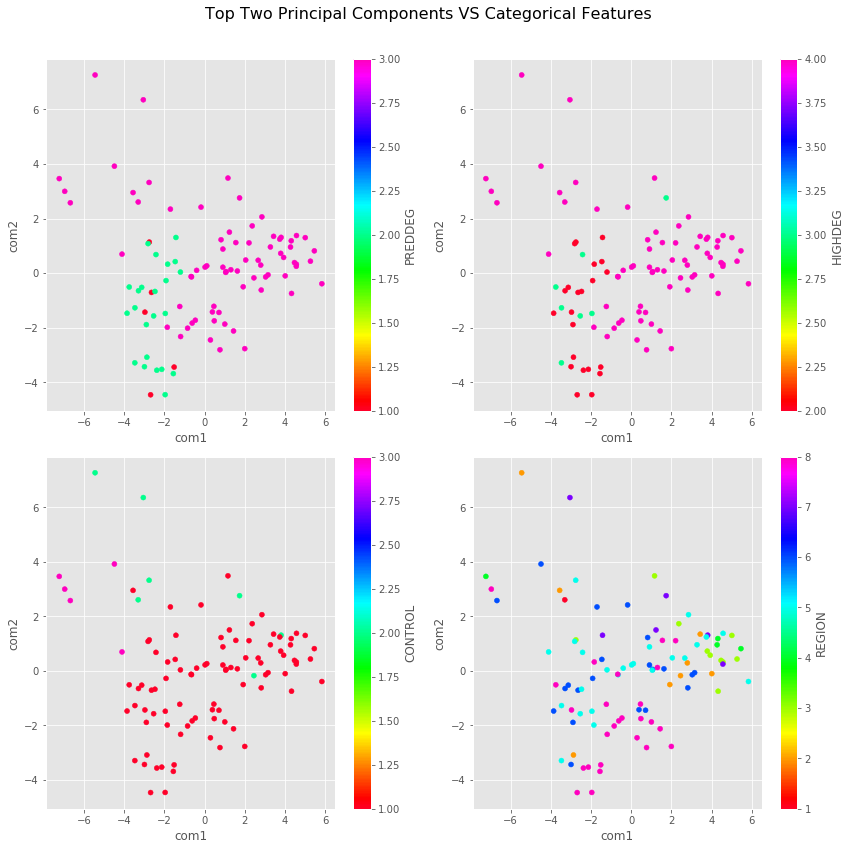

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

result.plot.scatter(ax=axes[0,0], x='com1', y='com2', c='PREDDEG', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[0,1], x='com1', y='com2', c='HIGHDEG', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[1,0], x='com1', y='com2', c='CONTROL', s = 25, colormap='gist_rainbow')
result.plot.scatter(ax=axes[1,1], x='com1', y='com2', c='REGION', s = 25, colormap='gist_rainbow')

fig.tight_layout()
plt.suptitle("Top Two Principal Components VS Categorical Features", fontsize=16)
fig.subplots_adjust(top=0.92)
plt.savefig('./output/svd圖.png', dpi=300)
plt.show()


>先將有興趣的四個categoricl features做散佈圖，其中發現"CONTROL"和"PREDDEG"有明顯的分群。

# 最後決定將"CONTROL"的圖形當作主要想分析討論的主題

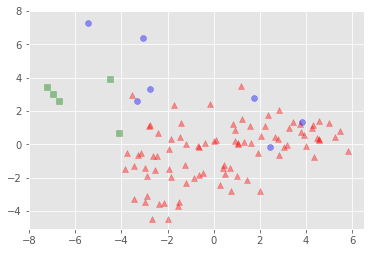

In [31]:
import matplotlib.pyplot as plt
import plotly.plotly as py

fig, ax = plt.subplots()

# 先利用另一種方法畫出原本散佈圖的點。
data_1 = np.array(result[result.CONTROL == 1])
data_2 = np.array(result[result.CONTROL == 2])
data_3 = np.array(result[result.CONTROL == 3])
ax.scatter(data_1[:, [7]], data_1[:, [8]], color='r', marker='^', alpha=.4)
ax.scatter(data_2[:, [7]], data_2[:, [8]], color='b', alpha=.4)
ax.scatter(data_3[:, [7]], data_3[:, [8]], color='g', marker='s', alpha=.4)
ax.autoscale()

plt.show()


>觀察上圖，<br/>
看出種類一的數量最多，並解多半集中在右下角。<br/>
而種類二其實算比較分散，但還是大約可以知道都出現在左上。<br/>
而第三種則是集中在左中的位置，自成一群。

>由此可知到人口數前一百名的學校在"CONTROL"的探討中，經過投影之後的資料就可以用視覺化的方式看出分群。
這也使資料的維度被大大減少，讓之後要加入討論的新資料就不需要收集全部變數，在計算複雜度上也能減少許多時間跟硬體空間。

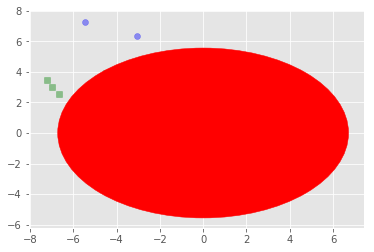

In [32]:
import matplotlib as mpl
import math

fig, ax = plt.subplots()

# 先利用另一種方法畫出原本散佈圖的點。
data_1 = np.array(result[result.CONTROL == 1])
data_2 = np.array(result[result.CONTROL == 2])
data_3 = np.array(result[result.CONTROL == 3])
ax.scatter(data_1[:, [7]], data_1[:, [8]], color='r', marker='^', alpha=.4)
ax.scatter(data_2[:, [7]], data_2[:, [8]], color='b', alpha=.4)
ax.scatter(data_3[:, [7]], data_3[:, [8]], color='g', marker='s', alpha=.4)

# 找出mean, r_x, r_y，再搭配"c"畫出橢圓形。
df_pro = pd.DataFrame(data_pro)
mean = np.array(df_pro.mean())
width = math.sqrt(s[0])*math.sqrt(5.99)
height = math.sqrt(s[1])*math.sqrt(5.99)

ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, color='r')

ax.add_patch(ell)
ax.autoscale()

plt.show()


>觀察上圖，我們利用95%的信心水準找出c平方的值為5.99，<br/>
然後再藉此與我們的主成份與次要成分的eigenvalue畫出橢圓。<br/>
然後從一開始取出的資料中我們原本共有100的點，<br/>
所以畫出的橢圓可以包涵95%的點，也就是剛好剩餘五個點沒被包含到。

>如果之後有別組資料進來，我們也可以利用這個橢圓去比較兩者資料的離散程度。<br/>
如果包涵的點比較多代表資料更集中，反之則比較分散。<br/>